<a href="https://colab.research.google.com/github/stenoe/FEDS/blob/main/notebooks/LectureNotebooks/FEDS_lecture_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating and using classes



## 1 What are classes?

A class is a paradigm of the object-oriented programming (OOP). 

For us, the easiest way to understand a class is to see it as a template to create an object that has attributes (data, informations) and behaviour (methods, functions) that allow to manipulate the attributes.


### 1.1 Creating a simple class 

We try to understand the concept of classes with a simple example. The idea is to have the attributes, here names, and the behaviour in one "object" integrated.

- We define a Person class by the reserved word `class`.  
- Our new class has two attributes, a first name and a last name.
- The class can tell the name of the person.




In [1]:
# define the Person class

class Person:
  def __init__(self, fname, lname):
    self.firstname = fname
    self.lastname = lname

  def printName(self):
    print(self.firstname, self.lastname)

In [2]:
me = Person("Steffen", "Noe")
me.printName()

Steffen Noe


#### 1.1.1 What does `self` mean?

The keyword `self` is used in classes to generate a reference to itself, therefore the name :)

Whenever we create and instance of the object (described by the class definition) we can access the attributes and the methods by this keyword.

It is given in class methods as **first** parameter to the function definintion. 

### 1.2 Inheritance

A class can be used to create a new class that inherit all attributes and behaviours.

In [3]:
# Most simple inheritance 

class Student(Person):
  pass

newStudent = Student("Qwert", "Yuiop")
newStudent.printName()

Qwert Yuiop


In the example before, the new class just adopt everything from the Person class but it does not add new attributes or behaviours. 

The new `Student` class is called a **child** class. The `Person` class is therefore the **parent** class of `Student`.



### 1.3 Adding new attributes and behaviour to the child class

In order to do so, we

1. create a new `Student` class that adds a new attribute `graduationYear`
2. add a new method to print this class' information

In [4]:
# Class with inhertance and added features

class Student(Person):
  def __init__(self, fname, lname, year):
    super().__init__(fname, lname)
    self.graduationYear = year

  def welcome(self):
    print(f"Welcome {self.firstname} {self.lastname} to the class of {self.graduationYear}.")

newStudent = Student("Qwert", "Yuiop", 2023)
newStudent.welcome()

Welcome Qwert Yuiop to the class of 2023.


In [5]:
# Let's check if the `printName()` method is also there

newStudent.printName()

Qwert Yuiop


#### 1.3.1 More info on the `self` keyword

The reference to `self` is always pointing to the current object instance. That means the new class has really inherited all attributes and behaviours. The ´Person´ class was used as a template!

### 1.4 Chaining -- Use classes to make operations more easy to read

When we use libraries like `pandas` or `matplotlib` we use the chaining notation. As example: 

```python
import pandas as pd
...
pd.plot.hist(bins=12, alpha=0.5)
```

is using the chaining notation. 

Here, we define a simple class that enables chaining for the operations it offers.  


In [6]:
class Adder:
  def __init__(self, number):
    self.number = number

  def add_two(self):
    self.number += 2
    return self # this makes it possible to chain

  def result(self):
    return self.number 

# Create an instance and use the chaining notation to calculate the result
x = Adder(15)
x.add_two().result()

17

In [7]:
# Ok, now let's try if we can make tha also without storing to a variable?

Adder(12).add_two().result()

14

#### 1.4.1 Let's now change `add_two` into a property of the class

Properties are decorators that help to control access to attributes. We can use it with the `@` notation. 

`@property` as decorator allows to use the `add_two()` method without the braces `()`. 

In [8]:
class Adder:
  def __init__(self, number):
    self.number = number

  @property
  def add_two(self):
    self.number += 2
    return self # this makes it possible to chain

  def result(self):
    return self.number 

# Create an instance and use the chaining notation to calculate the result
x = Adder(15)
x.add_two.result()

17

In [9]:
# and now without variable
Adder(12).add_two.result()

14

#### 1.4.2 Now, let's implement a setter decorator

We can use `@name.setter` to allow to set an attribute using simply the `=` sign via a function. In this example, we build a pair of similar named methods `add` to calculate `add(self)` and to set `add(self, addme)` the `addme` attribute of the class.

This example shows how to use these constructs in creating **easier readable** code. 


In [10]:
class Adder:
  def __init__(self, number):
    self.number = number
    self.addme = 0

  @property
  def add_two(self):
    self.number += 2
    return self # this makes it possible to chain
 
  @property
  def add(self):
    self.number += self.addme
    return self # this makes it possible to chain

  @add.setter
  def add(self, addme):
    self.addme = addme

  def result(self):
    return self.number 

# Create an instance 
x = Adder(15)
# set the via add setter mehtod
x.add=5
# use the chaining notation to calculate the result
x.add.result()

20

Btw. its possible to use the attribute directly as well! 

In [11]:
# Create an instance 
x = Adder(15)
# set the variable directly
x.addme=5
# use the chaining notation to calculate the result
x.add.result()

20

In [12]:
class addd:
  def __init__(self, num):
    self.number = num
    self.addme = 0
  
  def add(self):
    self.number += self.addme
    return self.number

In [13]:
z = addd(15)
z.addme = 5
z.add()

20

### 1.5 Creating a class to create random data

This class can be used to generate random data using different lambda functions. We can either subclass (create children) or use the class and set new behaviour via the fct setter.

- The `@property` (getter) and `@name.setter` (setter) decoraters need to be used together! 
- `@property` can be used alone!
- `@name.setter` cannot be used without `@property`!
- The attribute need to have a name distinct from the decorator's functions! We can use as example `_name` for an attribute with function `name(self):` and function `name(self, var):` 

In [14]:
import numpy as np
import pandas as pd

class randomData:
  # __init__() is the class constructor, it initialises the attributes
  # when a new instance of the class is created
  def __init__(self):
    self._fct = lambda x, e=0: x # default functio is identity
    self._length = 100
    self._seed = 42
    self._df = None
    self._scale = 10

  # Method that creates the random data and stores it into a dataframe
  @property
  def create(self):
    rng = np.random.default_rng(self._seed) 
    rng2 = np.random.default_rng(self._seed+1) 
  
    # Create x, y and eps
    x = rng.random(size=self._length)*50
    eps = rng2.normal(loc=0, scale=self._scale, size=len(x))
    y = self._fct(x, e=eps)

    df = pd.DataFrame({
      "x": x,
      "y": y,
      "e": eps
    })

    self._df = df
    return self # this let us chain the method!

  # Method to return just the data frame
  @property
  def df(self) -> pd.DataFrame:
    return self._df

  # Method to return or get the function stored in _fct
  @property
  def fct(self):
    return self._fct

  # Method to set a new function to _fct
  @fct.setter
  def fct(self, value):
    self._fct = value

  # Method to get the length
  @property
  def length(self):
    return self._length

  # Method to set the length
  @length.setter
  def length(self, value):
    self._length = value
   
  # Method to get the seed
  @property
  def seed(self):
    return self._seed
  
  # Method to set the seed
  @seed.setter
  def seed(self, value):
    self._seed = value

  # Method to get the scale
  @property
  def scale(self):
    return self._scale

  # Method to set the scale
  @scale.setter
  def scale(self, scale):
    self._scale = scale

  # Method to get information about the class status
  def getStateDict(self) -> dict:
    dc = {
          "function": self._fct, 
          "Length": self._length,
          "Scale": self.scale,
          "Seed" : self._seed
          }

    return dc


In [15]:
# Lets instantiate the object with its standard function (identity)
newRandom = randomData()
newRandom.getStateDict()

{'function': <function __main__.randomData.__init__.<locals>.<lambda>(x, e=0)>,
 'Length': 100,
 'Scale': 10,
 'Seed': 42}

In [16]:
# Lets set a new function to the object
newRandom.fct = lambda x, m=4, b=20, e=0: m * x + b + e
newRandom.getStateDict()


{'function': <function __main__.<lambda>(x, m=4, b=20, e=0)>,
 'Length': 100,
 'Scale': 10,
 'Seed': 42}

#### 1.5.1 Create a subclass that is providing an own linear function

In [17]:
class linearRandomData(randomData):
  def __init__(self):
    super().__init__()
    self._fct = lambda x, m=4, b=20, e=0: m * x + b + e

In [18]:
# Lets instantiate and check whats in the object
linearRandomData().getStateDict()

{'function': <function __main__.linearRandomData.__init__.<locals>.<lambda>(x, m=4, b=20, e=0)>,
 'Length': 100,
 'Scale': 10,
 'Seed': 42}

Here, we run the class object with the chaining methodology. Please note, we don't need to first save the object into a variable. We get the dataframe immediatly back and can use it for plotting as example.

In [19]:
# run the data generation process with chaining
linearRandomData().create.df

,x,y,e
0,38.697802,177.233505,2.442295
1,21.943922,114.557471,6.781783
2,42.929896,185.864290,-5.855294
3,34.868401,150.386875,-9.086731
4,4.708867,18.917087,-19.918382
...,...,...,...
95,31.514130,140.433932,-5.622586
96,18.090631,92.786293,0.423771
97,4.382496,13.954818,-23.575166
98,5.900295,38.397550,-5.203630


Let's try that out!

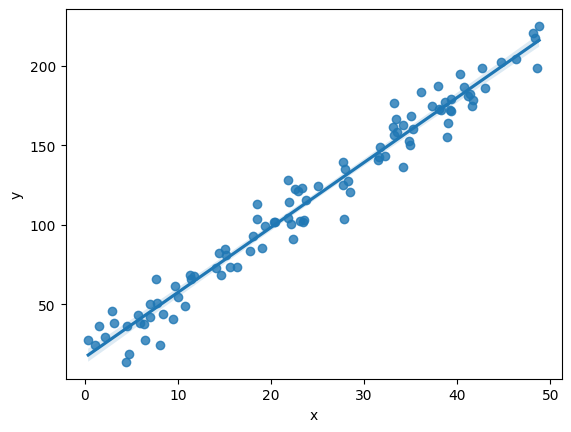

In [20]:
import seaborn as sns

df = linearRandomData().create.df

sns.regplot(x="x", y="y", data=df);

Let's see if we can do the same without storing the data into an explicit variable. 

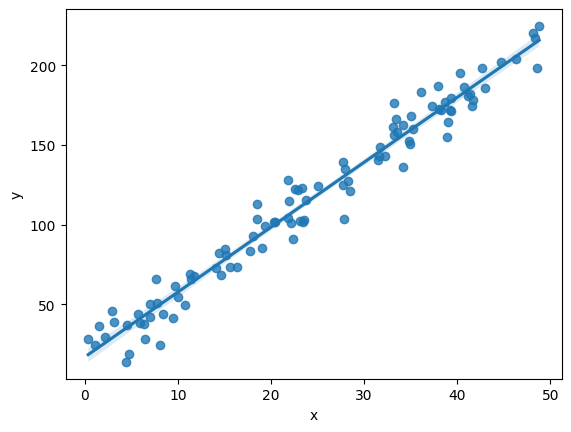

In [21]:
sns.regplot(x="x", y="y", data=linearRandomData().create.df);

#### 1.5.2 Lets try the sigmoind function as well by subclassing

In [22]:
class sigmoidRandomData(randomData):
  def __init__(self):
    super().__init__()
    self._fct = lambda x, x0=25, L=300, k=0.5, e=0: L / (1. + np.exp(-k * (x - x0))) + e
    self._scale = 10


In [23]:
newSigmoid = sigmoidRandomData()
newSigmoid.getStateDict()

{'function': <function __main__.sigmoidRandomData.__init__.<locals>.<lambda>(x, x0=25, L=300, k=0.5, e=0)>,
 'Length': 100,
 'Scale': 10,
 'Seed': 42}

In [24]:
newSigmoid.create.df

,x,y,e
0,38.697802,302.124446,2.442295
1,21.943922,60.266018,6.781783
2,42.929896,294.106367,-5.855294
3,34.868401,288.769830,-9.086731
4,4.708867,-19.906608,-19.918382
...,...,...,...
95,31.514130,283.255258,-5.622586
96,18.090631,9.612608,0.423771
97,4.382496,-23.565164,-23.575166
98,5.900295,-5.182268,-5.203630


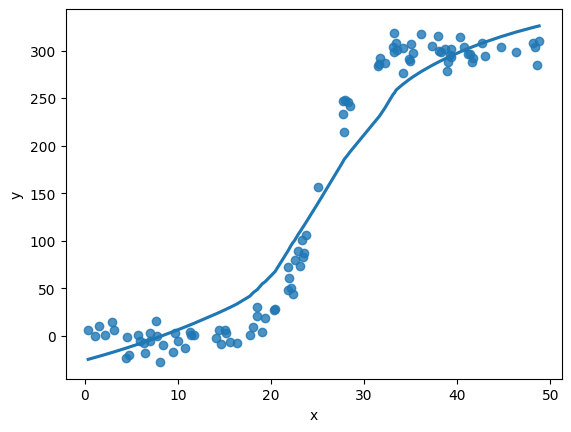

In [25]:
df2 = sigmoidRandomData().create.df

# sns.regplot(x="x", y=df2.y/300, data=df2, logistic=True);
sns.regplot(x="x", y=df2.y, data=df2, lowess=True);